<a href="https://colab.research.google.com/github/JatinB7/Portfolio-Projects/blob/main/Top_10_Video_Game_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Top10VideoGameStocks.csv to Top10VideoGameStocks.csv


In [4]:
df= pd.read_csv('Top10VideoGameStocks.csv')

In [5]:
df.head()

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,Sony Interactive Entertainment,SONY,JPY,28.525000,29.168751,20.850000,25.299999,14.535083,147012000
1,2000-02-01,Sony Interactive Entertainment,SONY,JPY,25.293751,31.475000,25.000000,31.350000,18.010864,67437000
2,2000-03-01,Sony Interactive Entertainment,SONY,JPY,30.100000,31.299999,21.700001,28.012501,16.093437,112674000
3,2000-04-01,Sony Interactive Entertainment,SONY,JPY,28.250000,28.250000,22.312500,22.562500,12.974537,74071000
4,2000-05-01,Sony Interactive Entertainment,SONY,JPY,22.700001,23.481251,17.750000,18.237499,10.487453,65035500


In [6]:
df.isnull().sum()

,0
Date,0
Company,0
Ticker Symbol,0
Currency,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2209 non-null   datetime64[ns]
 1   Company        2209 non-null   object        
 2   Ticker Symbol  2209 non-null   object        
 3   Currency       2209 non-null   object        
 4   Open           2209 non-null   float64       
 5   High           2209 non-null   float64       
 6   Low            2209 non-null   float64       
 7   Close          2209 non-null   float64       
 8   Adj Close      2209 non-null   float64       
 9   Volume         2209 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 172.7+ KB


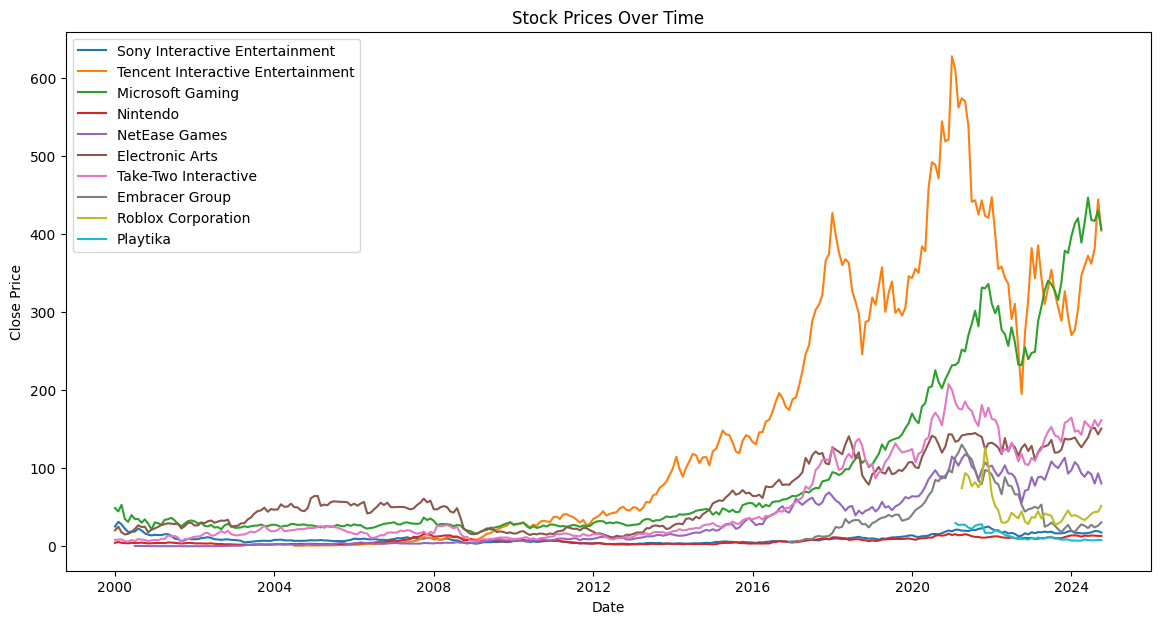

In [10]:
plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Close'], label=company)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

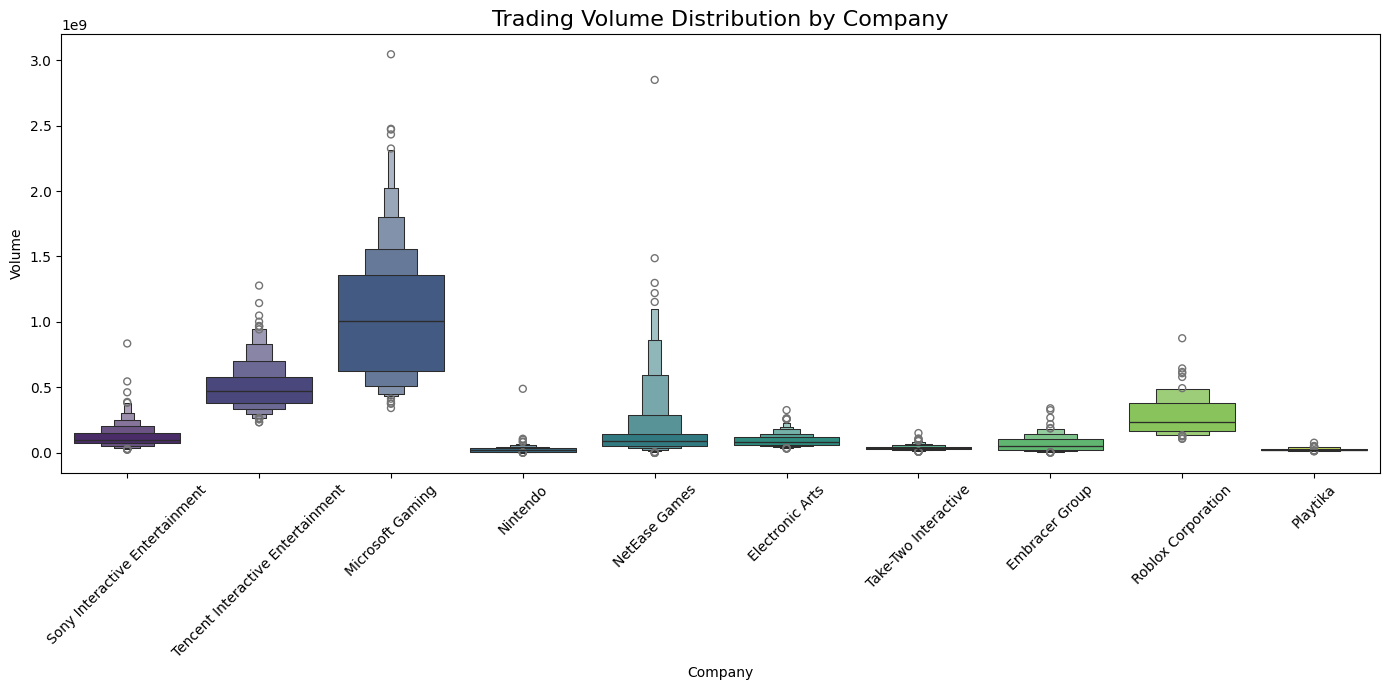

In [12]:
# Plot trading volume
plt.figure(figsize=(14, 7))

# Generate a colormap based on the number of unique companies
unique_companies = df['Company'].unique()
colors = sns.color_palette('viridis', len(unique_companies))  # Using a gradient-like palette

sns.boxenplot(x='Company', y='Volume', data=df, palette=dict(zip(unique_companies, colors)))

# Add title and format the x-axis
plt.title('Trading Volume Distribution by Company', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Correlation matrix to identify important features**

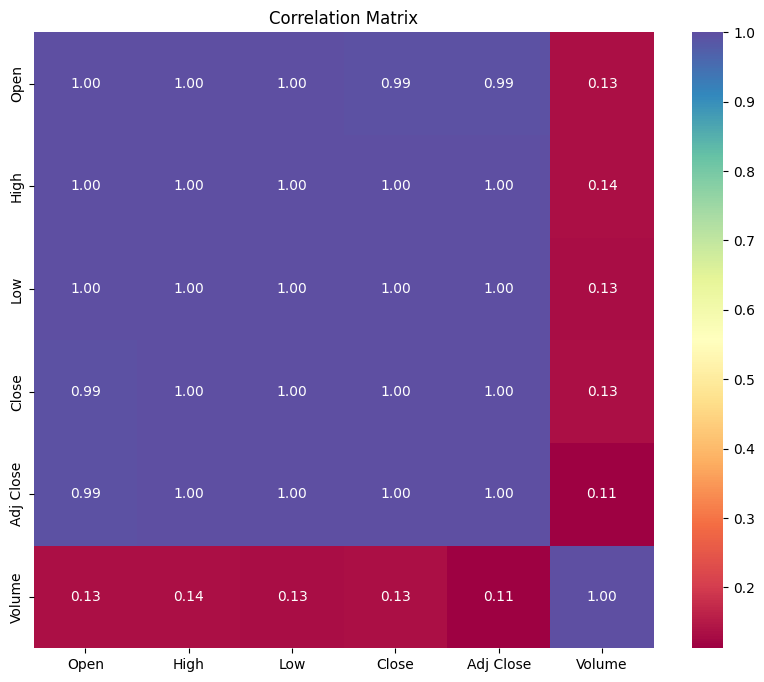

In [15]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Predicive analysis and modelling

1. Using simple linear regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

15.508475573156476

2. Using Random forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)  # You can adjust the number of trees with n_estimators
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [30]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

20.594439668895255

In [36]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert y to a NumPy array before reshaping
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


# Convert the data into sequences for LSTM
def create_sequences(X, y, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10  # sequence length
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, X_seq.shape[2])),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),verbose=0)

# Predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)

# Inverse transform the test data to compare with predictions
y_test_actual = scaler.inverse_transform(y_test)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [37]:
# Evaluating the model
mse = mean_squared_error(y_test_actual, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 504.47
